# Lab 3 : Sudhan Shrestha 8889436

In [114]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import pandas as pd

## Importing the data


In [115]:
# Getting the data
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

## Viewing the data shape and type
print(f"Shape of the data imported :")
print(f"diabetes_X Shape : {diabetes_X.shape}")
print(f"diabetes_y Shape : {diabetes_y.shape}")
print(f"\nData type of the data imported :")
print(f"diabetes_X is an array of {diabetes_y.dtype}")
print(f"diabetes_Y is an array of {diabetes_y.dtype}")

# importing the feature names of the data
feature_names = datasets.load_diabetes().feature_names
print(f"\nFeature Names : {feature_names}")

Shape of the data imported :
diabetes_X Shape : (442, 10)
diabetes_y Shape : (442,)

Data type of the data imported :
diabetes_X is an array of float64
diabetes_Y is an array of float64

Feature Names : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## Exploring the data

### First five data in diabeties_X

In [116]:
## Converting the data into DataFrame
diabetes_X = pd.DataFrame(diabetes_X)
diabetes_X.columns = feature_names
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### First five data in diabeties_y

In [117]:
#Converting for diabetes_y
diabetes_y = pd.DataFrame(diabetes_y)
diabetes_y.columns= ['Disease_Progression']
diabetes_y.head()

,Disease_Progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


### Combining these two data into a single dataframe and showing the first five

In [118]:
## Combining the two dataframe
diabetes = pd.concat([diabetes_X,diabetes_y], axis=1, join='inner')
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Disease_Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Various statistical information for the dataframe

In [119]:
# Stats for the data
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Disease_Progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


### Scatter plot : BMI vs Disease Progression

In [120]:
# Scatter plot 
fig = px.scatter(diabetes, x ='bmi', y ='Disease_Progression', color='age', hover_data=['bp'],title="BMI vs Disesease Progression")
fig.show()

The positive corealtion between the data can be seen from this scatter point however the variation between the datas are signiicant.

### Correlation of the data

In [121]:
# Corealation
corr = diabetes.corr()
fig = px.imshow(corr,text_auto=True, aspect='auto', title="Correlation between the data")
fig.show()

Correlation between various features can be seen from the above heat map.

## Preparing the data for fitting into the model

### Sum of null values in the data set.

In [122]:
#Checking the number of null values in the data.
diabetes.isna().sum() # no null values

age                    0
sex                    0
bmi                    0
bp                     0
s1                     0
s2                     0
s3                     0
s4                     0
s5                     0
s6                     0
Disease_Progression    0
dtype: int64

No null value was found in the data. Hence, we do not need to remove null values as a part of data cleaning

In [123]:
# Assigning the appropriate 
X = np.array(diabetes['bmi']).reshape(-1,1)
y = np.array(diabetes['Disease_Progression'])


In [124]:
# Creating train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)


In [125]:
# Shape of the train and test data
print(f"Shape of train_X: {X_train.shape}")
print(f"Shape of test_X: {X_test.shape}")
print(f"Shape of train_y: {y_train.shape}")
print(f"Shape of test_y: {y_test.shape}")

Shape of train_X: (353, 1)
Shape of test_X: (89, 1)
Shape of train_y: (353,)
Shape of test_y: (89,)


In [126]:
# creating the instance of the model & fitting
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [127]:
# making predictions
predict_y = model.predict(X_test)
predict_y

array([155.8592353 , 228.33052685, 138.00398955, 105.44442379,
       219.92805826, 274.54410406,  94.94133806,  97.0419552 ,
       120.14874381, 210.4752811 , 153.75861815, 134.85306384,
       182.11694963, 151.65800101, 259.83978404, 121.19905238,
       190.51941821,  94.94133806, 127.50090382, 136.95368098,
       209.42497253, 222.02867541, 113.84689237, 164.26170388,
       132.75244669, 198.9218868 , 223.07898398, 128.5512124 ,
       113.84689237, 214.67651539, 235.68268686,  87.58917804,
        84.43825232, 120.14874381, 154.80892673, 161.11077816,
       171.6138639 , 168.46293818, 124.3499781 , 131.70213812,
       205.22373824, 128.5512124 , 206.27404681, 128.5512124 ,
       195.77096108, 140.1046067 , 173.71448104, 212.57589825,
       107.54504093, 159.01016102, 211.52558968, 205.22373824,
       156.90954387, 128.5512124 , 174.76478961, 122.24936096,
       114.89720095, 104.39411521, 136.95368098, 187.36849249,
       128.5512124 , 192.62003536, 144.30584099, 194.72

These above values are the predicted values.

### Plotting graphs of the training data, testing data and the model.

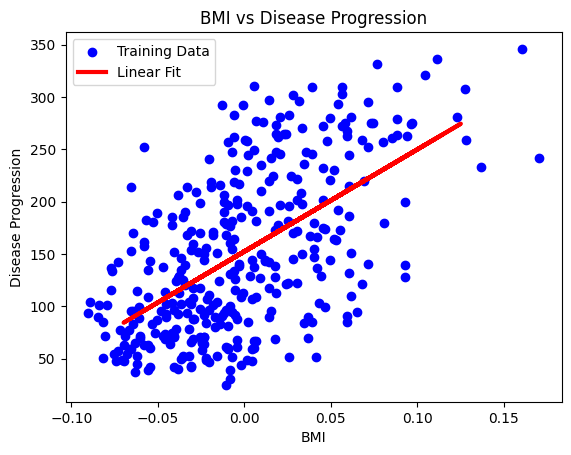

In [128]:
plt.scatter(X_train,y_train, color='blue', label="Training Data")
plt.plot(X_test,predict_y,color= 'red', linewidth=3, label="Linear Fit")
plt.title("BMI vs Disease Progression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.legend()
plt.show()

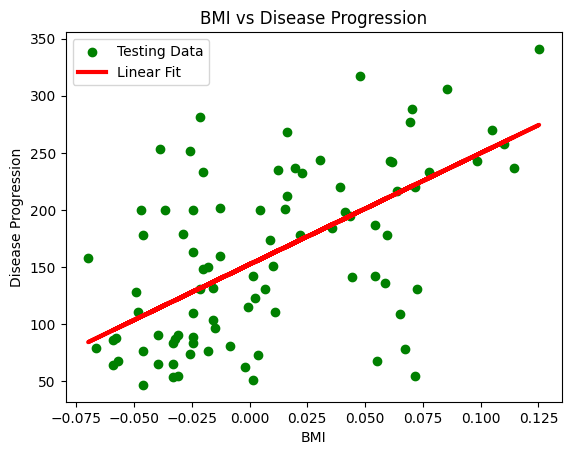

In [129]:
plt.scatter(X_test, y_test, color= 'green', label="Testing Data")
plt.plot(X_test,predict_y,color= 'red', linewidth=3, label="Linear Fit")
plt.title("BMI vs Disease Progression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.legend()
plt.show()

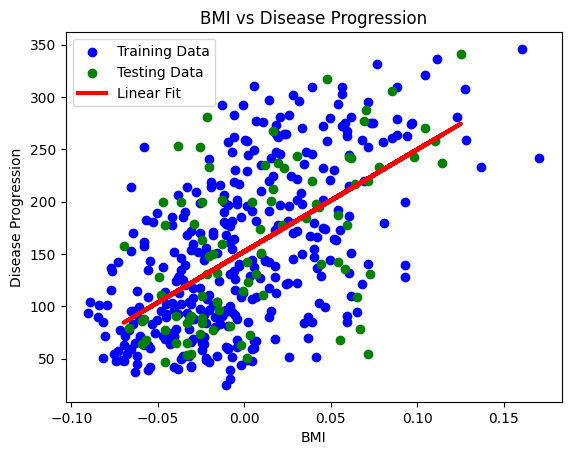

In [130]:
# Plotting
plt.scatter(X_train,y_train, color='blue', label="Training Data")
plt.scatter(X_test, y_test, color= 'green', label="Testing Data")
plt.plot(X_test,predict_y,color= 'red', linewidth=3, label="Linear Fit")
plt.title("BMI vs Disease Progression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.legend()
plt.show()

In the given plot, we can observe the representation of training data as blue dots and testing data as green dots. The red line in the plot corresponds to the prediction line, which was generated based on the relationship between BMI (Body Mass Index) and disease progression. Upon examining the plot, it becomes evident that there is considerable variability between the actual data points and the predicted values.

In [131]:
# coefficient & intercept
m_coff = model.coef_
m_intcpt = model.intercept_

print(f"Coefficient:{m_coff}\nThe Intercept: {m_intcpt}")

# Mean Squared Error
mse = metrics.mean_squared_error(y_test, predict_y)
print('Mean Squared Error: %.2f' % mse)

mae = metrics.mean_absolute_error(y_test, predict_y)
print(f"Mean Absolute Error: {mae}")

Coefficient:[974.48209999]
The Intercept: 152.45404935855575
Mean Squared Error: 3898.26
Mean Absolute Error: 49.325126131634555


The coefficent(slope) is 974.48, and it being positive means that there is a positive correlation between the values. i.e. if one vaiable increase other increases as well. 
The intercept is 152.45, which means that the regression line touchese y-axis at 152.404 units. 
The Mean Square Error and Mean Absolute Value are 3898.26 and 49.32 which means that this regression model has a significat variation between actual and predictied values.

In summary, the results obtained from this linear regression  shows that BMI has a significant impact on disease progression. However, there is still some difference between the predicted values and the actual values, as indicated by the Mean Squared Error (MSE) and Mean Absolute Error (MAE). This means that our model is not perfectly accurate, but it still provides valuable insights into the relationship between BMI and disease progression.